### Import libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder


### get classes

### load and normalize dog dataset

In [5]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import math

#transformer for normalization of images
# transforms.Compose -> pipeline that in this case firstly converts image to tensor and then normalizes it
# - first (0.5, 0.5, 0.5) are the mean for each channel(red, green, blue) and 
# - second is the standard deviation for each channel 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#batch, to have a certain amount of example pictures
batch_size = 128



#trainset
train_dir = '/home/ck/Documents/Deep_Learning_Python/case_study_1/dogs/data_set/train'
#testset
test_dir = '/home/ck/Documents/Deep_Learning_Python/case_study_1/dogs/data_set/test'

#load trainset
train_set = ImageFolder(train_dir,transform = transform)

#load testset
test_set = ImageFolder(train_dir,transform = transform)

#Get classes (folder names) of the training set
classes = train_set.classes


set_size = len(train_set)
val_set_size = math.ceil(set_size *0.2)
train_set_size = set_size - val_set_size


#Split train_set into training and validation set
train_data, val_data = random_split(train_set,[train_set_size, val_set_size])

#?????
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

31714 31714


### Print random image

Label : African_hunting_dog


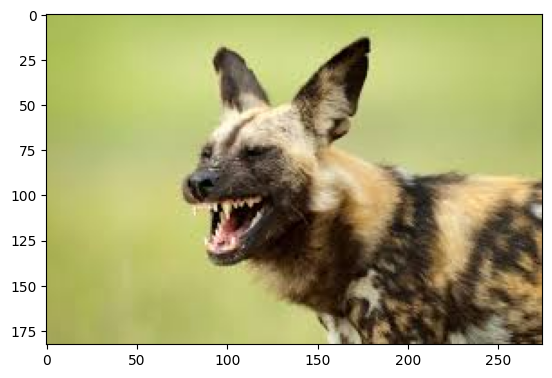

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image out of the Training set
#print("Follwing classes are there : \n",train_set.classes)
def display_img(img,label):
    print(f"Label : {train_set.classes[label]}")
    img = img / 2 + 0.5 # unnormalize picture
    plt.imshow(img.permute(1,2,0))

#display the first image [0] in the dataset
display_img(*train_set[0])    # * to unpack the tuple: (img, label)

In [4]:
####??? doesnt work 

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 119, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/home/ck/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 161, in collate_tensor_fn
    out = elem.new(storage).resize_(len(batch), *list(elem.size()))
RuntimeError: Trying to resize storage that is not resizable
